In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import time
import scipy.stats as st
from citipy import citipy
from dotenv import load_dotenv
import os
import seaborn as sns

sns.set()
load_dotenv()

True

# Vacation information

In [2]:
# Define a range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate a city list

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [4]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

## Perform API call from OpenWeatherMap

In [6]:
# Load information abou the api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = os.getenv('WEATHER')

In [7]:
# Build partial url
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
# Create dataframe and add columns
cities_df = pd.DataFrame({'City':cities})
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

In [9]:
# Use iterrows to iterate through cities dataframe
for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['City']

    # assemble url and make API request   
    response = requests.get(query_url+city).json()

    try:     
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index,'Country'] = response['sys']['country']
        cities_df.loc[index,'Date'] = response['dt']
        cities_df.loc[index,'Humidity'] = response['main']['humidity']
        cities_df.loc[index,'Lat'] = response['coord']['lat']
        cities_df.loc[index,'Lng'] = response['coord']['lon']
        cities_df.loc[index,'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
        print(f"Retrived information for country {response['id']} | {response['name']}.")
    
    except (KeyError, IndexError):
        print(f"{city.capitalize()} not found. Skipping.")
        
    print("===================")

Retrived information for country 3831208 | Qaanaaq.
Retrived information for country 6355222 | Yulara.
Retrived information for country 3833367 | Ushuaia.
Retrived information for country 6445060 | Sainte-Maxime.
Retrived information for country 495770 | Sharan.
Retrived information for country 2206939 | Bluff.
Retrived information for country 2163355 | Hobart.
Retrived information for country 2075265 | Busselton.
Retrived information for country 3430863 | Mar del Plata.
Retrived information for country 6167817 | Torbay.
Retrived information for country 2685750 | Östersund.
Retrived information for country 3894426 | Coyhaique.
Retrived information for country 5122534 | Jamestown.
Retrived information for country 6185377 | Yellowknife.
Retrived information for country 3874787 | Punta Arenas.
Retrived information for country 2278158 | Buchanan.
Retrived information for country 1015776 | Bredasdorp.
Retrived information for country 2422465 | Conakry.
Retrived information for country 40305

## Save results into csv file

In [10]:
cities_df = cities_df.replace('',np.nan)
cities_df = cities_df.dropna(how='any')
cities_df = cities_df.reset_index(drop=True)
cities_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [11]:
cities_df.to_csv('Resources/cities.csv')

## Analizing the data
### Arranging the data

In [12]:
#  Change values of cities dataframe to numeric to plot them
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Lng'] = pd.to_numeric(cities_df['Lng'])
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

### Plotting each vs Latitude

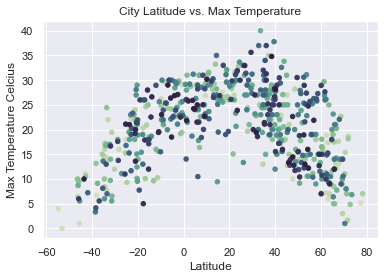

In [13]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Max Temp',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.savefig('Images/max_temp')
plt.show()

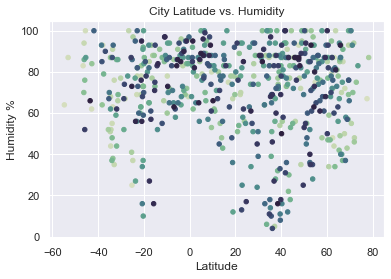

In [14]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Humidity',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('Images/humidity')
plt.show()

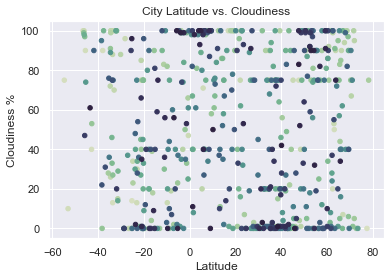

In [15]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Cloudiness',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.savefig('Images/clouds')
plt.show()

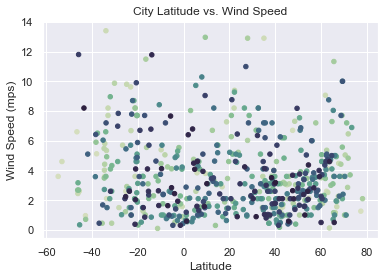

In [16]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Wind Speed',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.savefig('Images/wind_speed')
plt.show()

### Plotting South Hemispher

In [17]:
# Separe the the south hemisphere
south = cities_df.loc[cities_df['Lat'] < 0]

The r-squared is: 0.745


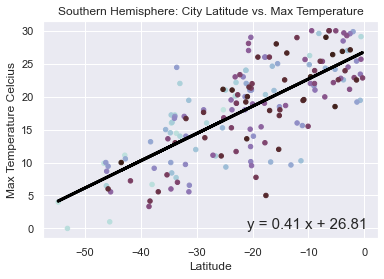

In [18]:
linear_regression = st.linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.annotate(line_eq,(-21,0), fontsize=15)
plt.savefig('Images/south-max_temp')
plt.show()

The r-squared is: 0.154


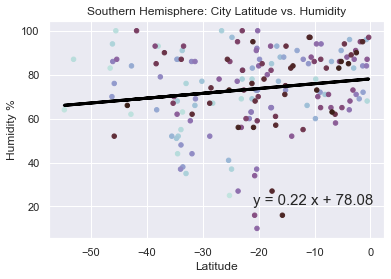

In [19]:
linear_regression = st.linregress(south['Lat'], south['Humidity'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(-21,21), fontsize=15)
plt.savefig('Images/south-humidity')
plt.show()

The r-squared is: -0.166


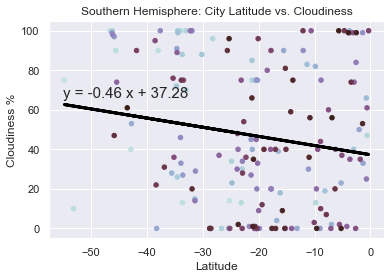

In [20]:
linear_regression = st.linregress(south['Lat'], south['Cloudiness'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-55,66), fontsize=15)
plt.savefig('Images/south-clouds')
plt.show()

The r-squared is: -0.215


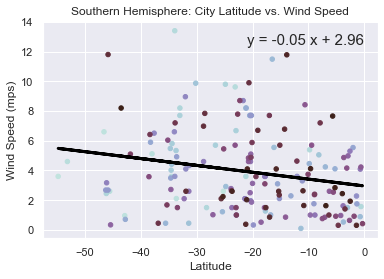

In [21]:
linear_regression = st.linregress(south['Lat'], south['Wind Speed'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.annotate(line_eq,(-21,12.5), fontsize = 15)
plt.savefig('Images/south-wind_speed')
plt.show()

### Plotting North Hemispher

In [22]:
north = cities_df.loc[cities_df['Lat'] >= 0]

The r-squared is: -0.591


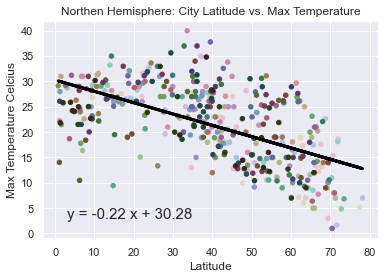

In [23]:
linear_regression = st.linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.annotate(line_eq,(3,3),fontsize=15)
plt.savefig('Images/north-max_temp')
plt.show()

The r-squared is: -0.042


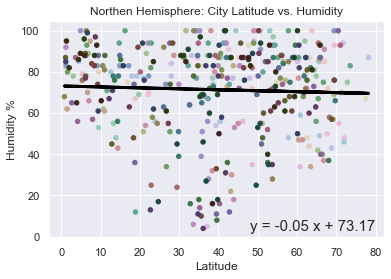

In [24]:
linear_regression = st.linregress(north['Lat'], north['Humidity'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Humidity',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(48,3),fontsize=15)
plt.savefig('Images/north-humidity')
plt.show()

The r-squared is: -0.077


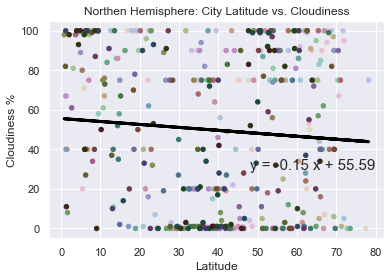

In [28]:
linear_regression = st.linregress(north['Lat'], north['Cloudiness'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(48,30),fontsize=15)
plt.savefig('Images/north-clouds')
plt.show()

The r-squared is: 0.013


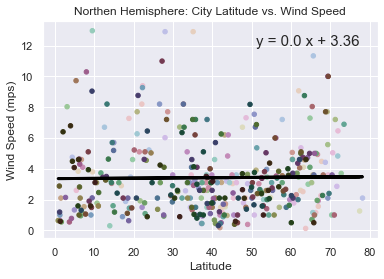

In [26]:
linear_regression = st.linregress(north['Lat'], north['Wind Speed'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.annotate(line_eq,(51,12),fontsize=15)
plt.savefig('Images/north-wind_speed')
plt.show()